# Meal Log Analysis for Oviva

This notebook documents the analysis of meal logs to gain insights into the eating behavior of users.


In [46]:
#lets read the data first
import json
import pandas as pd

with open('data.json') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df['log_time'] = pd.to_datetime(df['log_time'])
df

,user_id,log_time,description
0,U010,2020-01-15 08:30:00,A plate of scrambled eggs and toast.
1,U008,2020-02-02 12:15:00,A bowl of vegetable stir-fry with quinoa.
2,U005,2020-03-10 18:45:00,A serving of grilled chicken with steamed broc...
3,U003,2020-04-05 13:00:00,A bowl of lentil soup with a side salad.
4,U009,2020-05-20 20:00:00,A plate of spaghetti with marinara sauce and m...
...,...,...,...
719,U002,2020-03-05 17:05:00,A bowl of pho with rare beef slices and fresh ...
720,U003,2020-03-06 13:00:00,A slice of lemon meringue pie with a buttery c...
721,U009,2020-03-07 08:55:00,"A bagel with avocado, tomato, and a sprinkle o..."
722,U005,2020-03-08 18:50:00,A plate of shrimp scampi with linguine pasta.


## Meal-Logging Behavior Analysis

We categorize meal logs into breakfast, lunch, and dinner based on their log times and analyze the patterns.


In [48]:
# Function to categorize meals
def categorize_meal(time):
    if 3 <= time.hour < 10:
        return 'Breakfast'
    elif 10 <= time.hour < 16:
        return 'Lunch'
    else:
        return 'Dinner'

df['meal_type'] = df['log_time'].apply(lambda x: categorize_meal(x))

meal_logging_behavior = df['meal_type'].value_counts()
meal_logging_behavior

meal_type
Dinner       437
Lunch        177
Breakfast    110
Name: count, dtype: int64

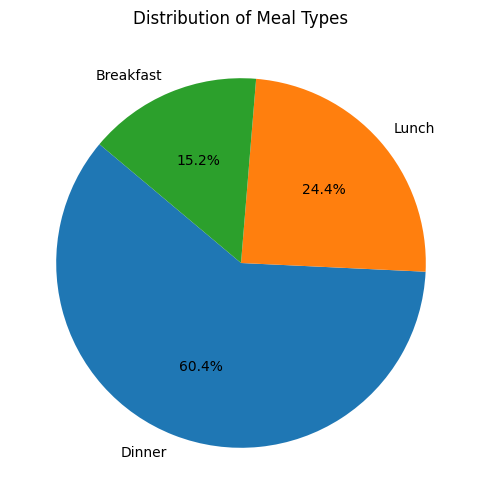

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(meal_logging_behavior, labels=meal_logging_behavior.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Meal Types')
plt.show()

***Most of log submissions are dinners*** 

In [14]:
df.head()

,user_id,log_time,description,meal_type
0,U010,2020-01-15 08:30:00,A plate of scrambled eggs and toast.,Breakfast
1,U008,2020-02-02 12:15:00,A bowl of vegetable stir-fry with quinoa.,Lunch
2,U005,2020-03-10 18:45:00,A serving of grilled chicken with steamed broc...,Dinner
3,U003,2020-04-05 13:00:00,A bowl of lentil soup with a side salad.,Lunch
4,U009,2020-05-20 20:00:00,A plate of spaghetti with marinara sauce and m...,Dinner


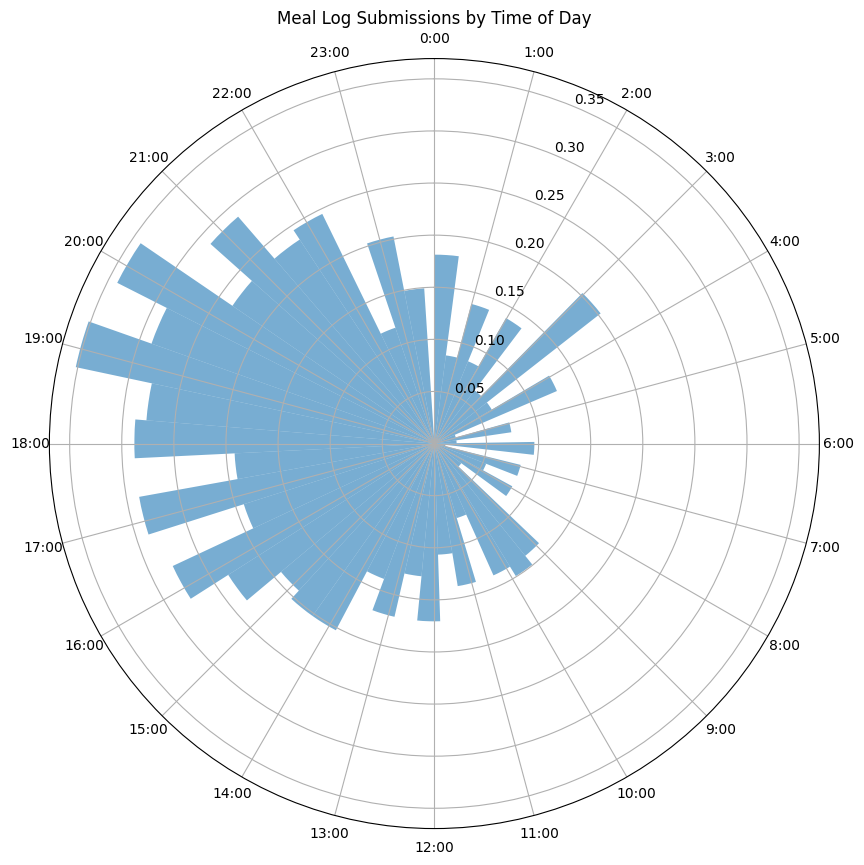

In [49]:
import numpy as np

# Extract hours and minutes from log_time and convert to a fractional hour (e.g., 1.5 for 1:30)
hours_minutes = df['log_time'].dt.hour + df['log_time'].dt.minute / 60

# Convert this time to radians for a circular plot
hours_minutes_in_radians = [time / 24.0 * 2.0 * np.pi for time in hours_minutes]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

ax.hist(hours_minutes_in_radians, bins=48, density=True, alpha=0.6)

# Set labels for the 24 hours
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(["{}:00".format(hour) for hour in range(24)])

plt.title('Meal Log Submissions by Time of Day')
plt.show()


- ***Most of the dinners are at 7 pm and 8 pm***
- ***Interestingly, we have considerable amount of users who eat at 3pm at night)***

## Identifying Most Frequently Consumed Food Items

We attempt to extract and count food items from the meal descriptions.


In [62]:
from collections import Counter
import re
# Function to extract food items
def extract_food_items(description):
    cleaned_description = re.sub(r'[^a-zA-Z\s]', '', description.lower())
    words = cleaned_description.split()
    
    words_to_remove = set(['in','out','during','for','at','with','and','on','of','a','plate', 'family', 'gathering', 'served', 'conference', 'room', 'meeting', 'beside', 'side', 'hot', 'bench', 'dinner', 'light', 'event', 'social','patio','arranged','knife','fry', 'office', 'desk', 'cream','assorted','lunch','window','everything','seasoning','grilled','slice','stir',
                   'bowl', 'mixed', 'cup', 'set', 'table', 'enjoyed', 'black', 'day', 'nook', 'reading', 'rainy', 'winter', 'evening', 'glass', 'nook', 'tray','sprinkle','prepared','crusty','whipped','open','book','marinara','baked','bar','break','windowsill','wild',
                   'plate', 'set', 'kitchen', 'bowl', 'table', 'spoon', 'fork', 'laid', 'counter', 'room', 'breakfast', 'living', 'tray', 'garden', 'serene', 'restaurant', 'whole','smoked','collard','eyed','wooden','warming','hand','jasmine',
                   'cup', 'enjoyed', 'table', 'placed', 'green', 'cafe', 'cutlery', 'cozy', 'island', 'ladle', 'shelf', 'morning', 'blanket', 'balcony', 'city', 'glass dining', 'dining', 'serving', 'picnic', 'chamomile', 'herbal', 'bedside', 'afternoon', 'relaxing'])
    res = []
    for word in words:
        if word not in words_to_remove:
           res.append(word) 
    return res

# Extract food items
food_items = df['description'].apply(extract_food_items)

# Flatten and count
all_food_items = [item for sublist in food_items for item in sublist]
food_item_counts = Counter(all_food_items)

# Most common food items
most_common_food_items = food_item_counts.most_common(15)
most_common_food_items

[('tea', 110),
 ('coffee', 87),
 ('soup', 42),
 ('salad', 35),
 ('cheese', 24),
 ('cocoa', 24),
 ('chicken', 22),
 ('sandwich', 22),
 ('bread', 22),
 ('nuts', 22),
 ('fruits', 22),
 ('sandwiches', 22),
 ('desserts', 21),
 ('rice', 19),
 ('vegetable', 17)]

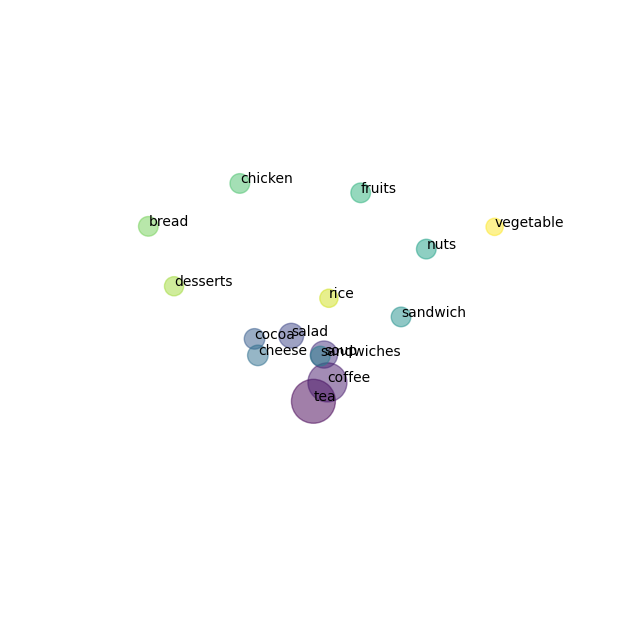

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

labels, sizes = zip(*most_common_food_items)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Normalize and sort the sizes of the bubbles
sizes, labels = zip(*sorted(zip(sizes, labels), reverse=True))
sizes = [s * 1000 / max(sizes) for s in sizes]  # Scale the bubbles' sizes

# Arrange bubbles in a spiral
theta = np.linspace(0, 4 * np.pi, len(labels))
x = theta * np.cos(theta)
y = theta * np.sin(theta)
z = np.linspace(-1, 1, len(labels))

scatter = ax.scatter(x, y, z, s=sizes, c=colors, alpha=0.5)

for label, x_count, y_count, z_count in zip(labels, x, y, z):
    ax.text(x_count, y_count, z_count, label)

ax.axis('off')
plt.show()


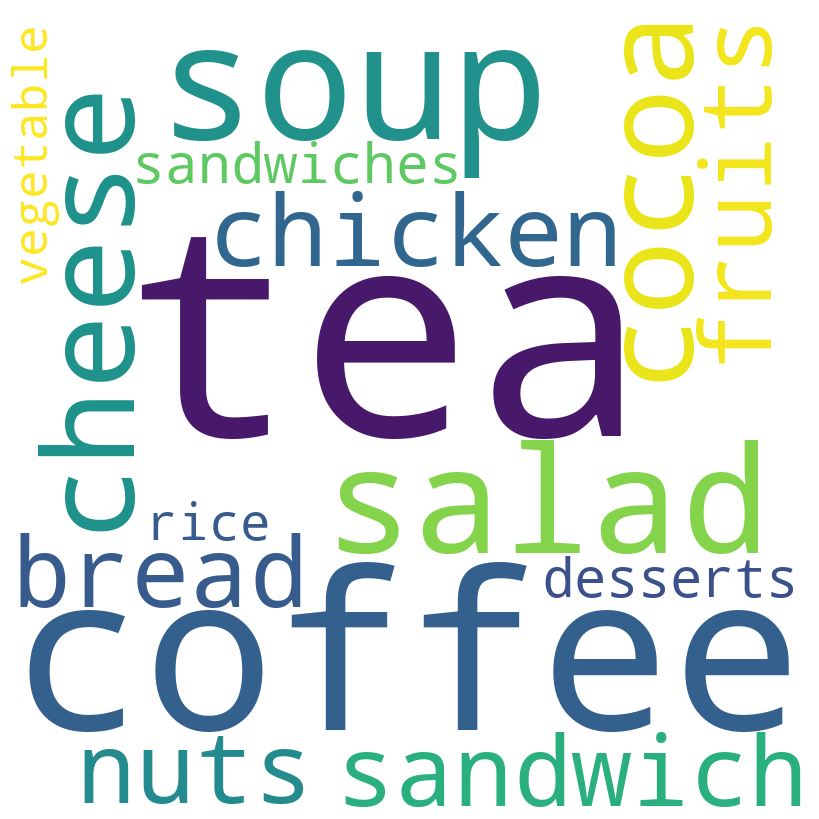

In [91]:
#!pip3 install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='viridis',
                      min_font_size=10).generate_from_frequencies(dict(most_common_food_items))

# Plotting the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


***Tea is mos consumed drink***

## Building a Scalable Solution

For handling the processing of big data with around 100k logs, I prefer distributed processing it is easy to scale and efficient. Fortunately, there is a Spark tool to do this kind of distributed processing. We can use PySpark library as a Spark api for Python.

Due to some reasons I can't setup Java and Hadoop environment to my laptop, so even though I dont have chance to provide working solution, the solution will be something similar to the below code

In [ ]:
#!pip3 install pyspark
from pyspark.sql.functions import explode, col
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Oviva").getOrCreate()
df = spark.createDataFrame(df)
words_df = df.select(explode(col("description")).alias("word"))
word_counts = words_df.groupBy("word").count()

#### Reference
I have used mostly ChatGPT, Medium and Stackoverflow for my work